# Homework 2

### Due: Thurs Nov. 12 @ 11:59pm ET

In this homework we will be performing model evaluation, model selection and hyperparameter tuning in both a regression and classification setting.

We will be working with a small set of home sales data from as we might see on a real-estate website.


## Instructions

Follow the comments below and fill in the blanks (\_\_\_\_) to complete.

Please 'Restart and Run All' prior to submission.

Out of 45 points total.

## Part 0: Environment Setup

In [1]:
# 1. (2pts) Set up our environment with common libraries and plotting.
#    Note: generally we would do all of our imports here but some imports
#    have been left till later where they are used.

# Import numpy as np, pandas as pd, matplotlib.pylab as plt and seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns

# Set the seaborn style to 'darkgrid'
sns.set_style("darkgrid")

# Execute the matplotlib magic function to display plots inline
%matplotlib inline

## Part 1: Regression

In Part 1 we will try to predict a real value home sale price using several models.

       SqFtTotLiving_x1000  SqFtLot_x1000  SqFtDriveway_x1000    Bathrooms  \
count          1000.000000    1000.000000              1000.0  1000.000000   
mean              1.972377       7.456591                 1.0     2.096250   
std               0.821994       3.727398                 0.0     0.786554   
min               0.620000       0.746000                 1.0     0.750000   
25%               1.340000       5.000000                 1.0     1.500000   
50%               1.840000       7.181000                 1.0     2.000000   
75%               2.460000       9.284750                 1.0     2.500000   
max               4.700000      19.984000                 1.0     4.750000   

          Bedrooms  
count  1000.000000  
mean      3.337000  
std       0.907885  
min       0.000000  
25%       3.000000  
50%       3.000000  
75%       4.000000  
max       9.000000  


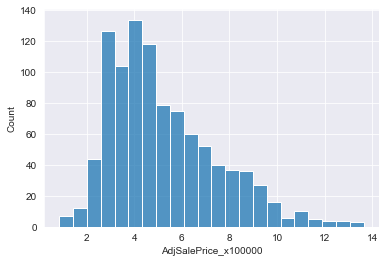

In [2]:
# 2. (4pts) Load and prepare our data.

# Read in the csv file house_sales_subset.csv using default parameter settings
df = pd.read_csv("../data/house_sales_subset.csv")

# Create a dataframe X which contains the columns:
#    'SqFtTotLiving_x1000', 'SqFtLot_x1000', 'SqFtDriveway_x1000', 'Bathrooms', 'Bedrooms'
X = df[['SqFtTotLiving_x1000', 'SqFtLot_x1000', 'SqFtDriveway_x1000', 'Bathrooms', 'Bedrooms']]

# Create a series y_r which contains only the last column AdjSalePrice_x100000
#    Note: the '_r' here is denote the different targets for regression and classification
y_r = df.iloc[:,-1]

# Confirm that all features of X are similar in scale by displaying the output of describe()
print(X.describe())

# Use sns.histplot() to plot y_r to get a sense of the distribution of the target
sns.histplot(x=y_r);

In [3]:
# 3. (3pts) Create a held-aside set

# Import train_test_split from sklearn.model_selection
from sklearn.model_selection import train_test_split

# Split X and y_r into 80% train and 20% test using train_test_split 
#   Use random_state=42 for grading consistency
X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(X, y_r, test_size = 0.20, random_state = 42)

# Print out the the length of y_test_r divided by the length y_r to confirm our test set size.
print('proportion of data in test set: {:0.2f}'.format(len(y_test_r)/len(y_r)))

proportion of data in test set: 0.20


### Part 1.1 Baseline Regressor

In [4]:
# 4. (3pts) Create a Dummy Regressor and confirm the expected performance on the training set.

# Import the DummyRegressor model from sklearn 
from sklearn.dummy import DummyRegressor

# Instantiate a dummy model using strategy="mean" 
dummy_r = DummyRegressor(strategy = "mean")

# Train the dummy model on the training set created above
dummy_r.fit(X_train_r, y_train_r)

# Calculate and print the training set R2 score of the dummy model.
dummy_r_training_r2 = dummy_r.score(X_train_r, y_train_r)

print('dummy training set R2: {:.2f}'.format(dummy_r_training_r2))

dummy training set R2: 0.00


### Part 1.2 Linear Regression and Cross-Validation

In [5]:
# 5. (4pts) Import the Linear Regression model and fit on the training set.

# Import the LinearRegression model from sklearn
from sklearn.linear_model import LinearRegression

# Instantiate a LinearRegression model with default arguments and fit on the training set
lr = LinearRegression().fit(X_train_r, y_train_r)

# Calculate and print the training set R2 of the LinearRegression model
lr_training_r2 = lr.score(X_train_r, y_train_r)

print('lr training set R2: {:.2f}'.format(lr_training_r2))

lr training set R2: 0.52


In [6]:
# 6. (2pts) Use 5-fold Cross Validation to measure variation of Liner Regression R2 performance.

# Import cross_val_score from sklearn.
from sklearn.model_selection import cross_val_score

# Generate 5-fold cross-validation R2 scores for a LinearRegression model on the training set.
scores = cross_val_score(LinearRegression(), X_train_r, y_train_r, cv = 5)

# Print out the R2 found by cross_val_score
scores

array([0.56782853, 0.51348723, 0.52743576, 0.53201968, 0.41705308])

In [7]:
# 7. (2pts) Calculate mean cv R2 score +- 2 standard deviations for the dummy model.

# Calculate the mean cross validation score
lr_r_cvr2_mean = scores.mean()

# Calculate 2 standard deviations of the cross validation scores
lr_r_cvr2_2std = 2* scores.std()

# Print out the mean R2 and 2 standard variations for the LinearRegression model
print('lr mean cv r2: {:.2f} +- {:.2f}'.format(lr_r_cvr2_mean,lr_r_cvr2_2std))

lr mean cv r2: 0.51 +- 0.10


### Part 1.3 Evaluate on Test Set

In [8]:
# 8. (2pts) Evaluate performance of our trained DummyRegressor and LinearRegression model on the test set

# Calculate R2 on the test set using the trained models
dummy_r_test_r2 = dummy_r.score(X_test_r, y_test_r)

lr_test_r2 = lr.score(X_test_r, y_test_r)

print('dummy test R2 : {: .2f}'.format(dummy_r_test_r2))
print('   lr test R2 : {: .2f}'.format(lr_test_r2))

dummy test R2 : -0.00
   lr test R2 :  0.51


---

## Part 2: Classification

Here we build several models to classify low vs. high adjusted sales price and practice creating validation curves and performing grid search.

### Create Classification Target

In [9]:
# We'll create a binary target for classification by thresholding at the mean of our AdjSalePrice

# The classes are:
#    Low AdjSalePrice   = 0
#    High AdjSalePrice = 1

y_c = (df.AdjSalePrice_x100000 > df.AdjSalePrice_x100000.mean()).astype(int)

### Part 2.1 Create a Held-Aside Aet

In [10]:
# 9. (3pts) Create a training and test/held-aside set

# Split into 80% train and 20% test using train_test_split with random_state=42
#    Use the new y_c target and the same X we used for regression
#    Also, use y_c to stratify the data so that the class proportions are the same in train and test
#    Save the result into the variables X_train_c, X_test_c, y_train_c, y_test_c
#    
X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(X, y_c, test_size = 0.2, random_state = 42)

# Print out the proportion of Low values (label of 0) in y_c
print(sum(y_c == 0) / len(y_c))

# Check to make sure that train and test have the same balance of classes.
# Assert that the absolute difference between train and test in proportion of Low values is smaller than .01
# Note that there may be a slight difference between train and test due to the different number of samples.
assert abs( sum(y_train_c == 0) / len(y_train_c) - sum(y_test_c == 0) / len(y_test_c) ) < 0.01

0.589


### Part 2.2 Measure baseline performance

In [11]:
# 10. (2pts)  Create a Dummy Classifier and confirm the expected performance on the training set.

# Import the DummyClassifier class
from sklearn.dummy import DummyClassifier

# Instantiate and fit a DummyClassifier on the training set
#   Set the strategy argument to "most_frequent"
dummy_c = DummyClassifier(strategy = 'most_frequent').fit(X_train_c, y_train_c)

# Print the trained DummyClassifier accuracy on the training set.
# It should match the value we saw above.
print('dummy training set accuracy: {:.3f}'.format(dummy_c.score(X_train_c, y_train_c)))

dummy training set accuracy: 0.590


In [12]:
sum(y_train_c == 0)

472

In [13]:
len(y_train_c) * .589

471.2

### Part 2.3 RandomForest model

In [14]:
# 11. (4pts) Import, train and calculate 5-fold cv accuracy for a RandomForest model on the training set

# Import the RandomForestClassifier model from sklearn
from sklearn.ensemble import RandomForestClassifier

# Get 5 fold cross-validation training set accuracy scores for 
#   a RandomForestClassifier with 100 trees and max_depth=None (the default settings)
#   To speed up training also set n_jobs=-1 in the cross_val_score call (to use all available cores)
rfc_cvscores = cross_val_score(RandomForestClassifier(max_depth = None),
                               X_train_c,
                               y_train_c,
                               n_jobs = -1,
                               cv = 5)

# Calculate mean cv accuracy
rfc_cvacc_mean = rfc_cvscores.mean()

# Calculate 2 standard deviations for the cv scores
rfc_cvacc_2std = 2*rfc_cvscores.std()

print('rfc mean cv accuracy: {:.3f} +- {:.2f}'.format(rfc_cvacc_mean,rfc_cvacc_2std))

rfc mean cv accuracy: 0.811 +- 0.04


### Part 2.4 RandomForests and Validation Curve

In [15]:
# 12. (5pts) Generate a validation curve over different tree depths in a Random Forest

# Import the validation_curve function from sklearn.model_selection
from sklearn.model_selection import validation_curve

# In the RandomForestClassifier model, the depth of trees is set via max_depth
# Here we'll try the depths 3,5,10,20,30
depths = [3,5,10,20,30]

# Generate the train_scores and test_scores for max_depth at these different depths using validation_curve
#   Use RandomForestClassifier with default arguments except n_jobs=-1
#   Use our training set X_train_c, y_train_c
#   Use 3-fold cross validation (reducing to 3 to speed things up)
#   Use accuracy as the scoring metric
train_scores,test_scores = validation_curve(RandomForestClassifier(),
                                           X_train_c, y_train_c,
                                           param_name = 'max_depth',
                                           param_range = depths,
                                           cv = 3,
                                           scoring = 'accuracy')

# train_scores and test_scores contain a matrix of values
#   For each depth (rows) there are 3 scores (columns), one for each fold
#   Take the mean across folds (columns) and store in mean_train_scores and mean_test_scores
mean_train_scores = np.mean(train_scores, axis = 1)
mean_test_scores = np.mean(test_scores, axis = 1)

# There should be five numbers in each list, each value between 0 and 1
print(mean_train_scores)
print(mean_test_scores)

[0.82186198 0.87374248 0.98437928 0.99437382 0.99437382]
[0.8012306  0.81996189 0.80376034 0.8149916  0.8025072 ]


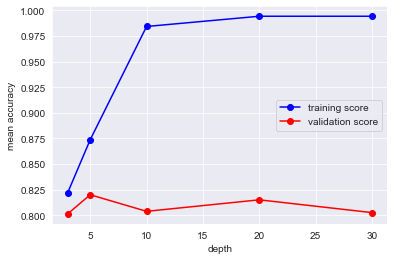

In [16]:
# 13. (4pts) Plot the validation curve

# Plot mean_train_scores and mean_test_scores on the same plot
#    use either ax.plot() or plt.plot()
#    use "depths" for the x values
#    add a label to each line ('train' and 'test') 
#    add a legend
#    label the x-axis as "depth" and the y-axis as "mean accuracy"
# Note: use as many lines as necessary

plt.plot(depths, mean_train_scores, 'o-', color = 'b', label = 'training score');
plt.plot(depths, mean_test_scores, 'o-', color = 'r', label = 'validation score');
plt.xlabel("depth");
plt.ylabel("mean accuracy");
plt.legend(loc='best');

### Part 2.5 RandomForests and Grid Search

In [17]:
# 14. (4pts) Perform 5-fold cross validated grid search over the number of trees and tree depth.

# Import GridSearchCV
from sklearn.model_selection import GridSearchCV

# Create the grid of parameters to test
#   The parameter settings to try are 'n_estimators':[10,50,100,200], 'max_depth':[3,5,10,20,30]
params = {"n_estimators": [10, 50, 100, 200],
         "max_depth": [3, 5, 10, 20, 30]}

# Instantiate and fit GridSearchCV on the classification training set
#   using 3-folds (for speed), the RandomForestClassifier and default scoring (accuracy).
#   Make sure refit=True (default) so the model is retrained on the entire training set.
#   Set n_jobs=-1 to use all cores.
gscv_rf = GridSearchCV(RandomForestClassifier(),
                      param_grid = params, 
                      cv = 3,
                      refit = True,
                      n_jobs = -1,
                      scoring = 'accuracy')

gscv_rf.fit(X_train_c, y_train_c)

# Print out the best the best hyperparameter setting found and the mean accuracy they produced (best_score_)
print('rf best hyperparams      : {}'.format(gscv_rf.best_params_))
print('rf best mean cv accuracy : {:.3f}'.format(gscv_rf.best_score_))

# Note that you may get different answers on different runs due to 
#   the randomness within the Random Forest algorithms as well as
#   the random cv splits used at each grid point

# (to think about, don't need to answer)
#  Does this match what we might have guessed our max_depth should be from the validation plot above?
#  Why might it not?

rf best hyperparams      : {'max_depth': 5, 'n_estimators': 200}
rf best mean cv accuracy : 0.820


### Part 2.6 Evaluate on Test

In [18]:
# 15. (1pts) Evaluate our trained RandomForest model on the test set

# Calculate accuracy on the held aside test set using the trained random forest model in gscv_rf.
#   Note that we don't need to retrain on the full X_train_c,y_train_c as we used refit=True
test_acc = gscv_rf.score(X_test_c, y_test_c)

print('test acc : {:.3f}'.format(test_acc))

test acc : 0.815
